# Global Power Plant Database
Problem Statement:


Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read csv file as dataframe(df):


In [3]:
df=pd.read_csv("GlobalPowerPlant_data")

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking the dataset
df.shape

(907, 27)

In [7]:
#Dataset contains 907 rows and 27 columns.

In [8]:
# checking the first 5 and last 5 data of the dataset.
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [9]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
# Get the complete info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          907 non-null    object 
 5   commissioning_year   907 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   907 non-null    object 
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


Dataset contains the 15 float and 12 object type of data.

# Checking for the null values:


In [11]:
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [13]:
df.isnull().sum().sum()

10445

So the above dataset contains 10445 null values.

Dropping irrelevant columns fron the data:

In [14]:
df.drop(columns=['country','country_long','other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [15]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.drop(['gppd_idnr','owner','url'],axis=1,inplace=True)

In [17]:
df.drop('name',axis=1,inplace=True)

In [18]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

# Checking the skewnwss:

In [19]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

In [20]:
#There are null values present in the dataset, so filling the values with their mean, mode and median values.



In [21]:
df['latitude'].mean()   
df['latitude']=df['latitude'].fillna(df['latitude'].mean())


In [22]:
df['other_fuel1'].mode()      
df['geolocation_source'].mode() 

0    WRI
dtype: object

In [23]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [24]:
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())


In [25]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN


In [26]:
df.fillna(df.median()[0], inplace=True)

In [27]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [28]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,907.000000,9.070000e+02,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02
mean,326.223755,21.197918,77.427103,1998.728776,5.920000e+01,1516.689956,1510.071296,1565.361383,1657.121797,1314.589897,5.920000e+01
std,590.085456,6.079148,4.815073,13.158621,8.246843e-13,2785.604307,2984.994556,3005.087210,3046.862910,3286.682207,8.246843e-13
min,0.000000,8.168900,68.644700,1927.000000,5.920000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,5.920000e+01
25%,16.725000,17.072000,74.388900,1998.000000,5.920000e+01,801.123775,711.181225,737.205450,817.977250,59.200000,5.920000e+01
50%,59.200000,21.281800,76.719500,2001.000000,5.920000e+01,801.123775,711.181225,737.205450,817.977250,59.200000,5.920000e+01
75%,385.250000,25.176450,79.206100,2003.000000,5.920000e+01,801.123775,711.181225,737.205450,817.977250,687.754000,5.920000e+01
max,4760.000000,34.649000,95.408000,2018.000000,5.920000e+01,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,5.920000e+01


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

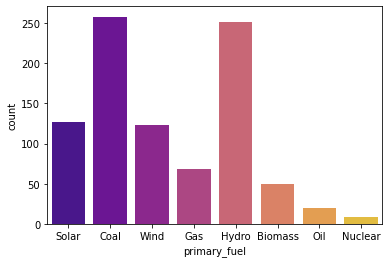

In [29]:
print(df['primary_fuel'].value_counts())
sns.countplot(x='primary_fuel',data=df,palette='plasma')

In [30]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,0.050984,0.199299,0.211042,NaN,0.793497,0.819676,0.853008,0.868338,0.905488,NaN
latitude,0.050984,1.000000,0.036341,0.087937,NaN,0.058594,0.053869,0.047677,0.057897,0.062353,NaN
longitude,0.199299,0.036341,1.000000,0.029583,NaN,0.106855,0.123763,0.145640,0.154014,0.195059,NaN
commissioning_year,0.211042,0.087937,0.029583,1.000000,NaN,0.076971,0.108752,0.140964,0.153554,0.148393,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.793497,0.058594,0.106855,0.076971,NaN,1.000000,0.963719,0.935067,0.904075,0.890530,NaN
generation_gwh_2015,0.819676,0.053869,0.123763,0.108752,NaN,0.963719,1.000000,0.973231,0.940229,0.928321,NaN
generation_gwh_2016,0.853008,0.047677,0.145640,0.140964,NaN,0.935067,0.973231,1.000000,0.973909,0.959857,NaN
generation_gwh_2017,0.868338,0.057897,0.154014,0.153554,NaN,0.904075,0.940229,0.973909,1.000000,0.980701,NaN
generation_gwh_2018,0.905488,0.062353,0.195059,0.148393,NaN,0.890530,0.928321,0.959857,0.980701,1.000000,NaN


<AxesSubplot:>

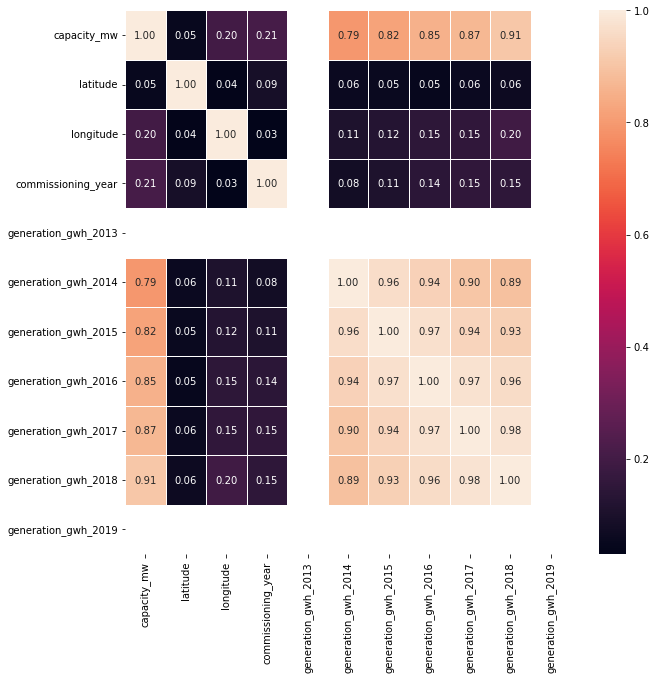

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor="white",fmt=".2f")

In [34]:
df.drop(columns=['generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

<AxesSubplot:>

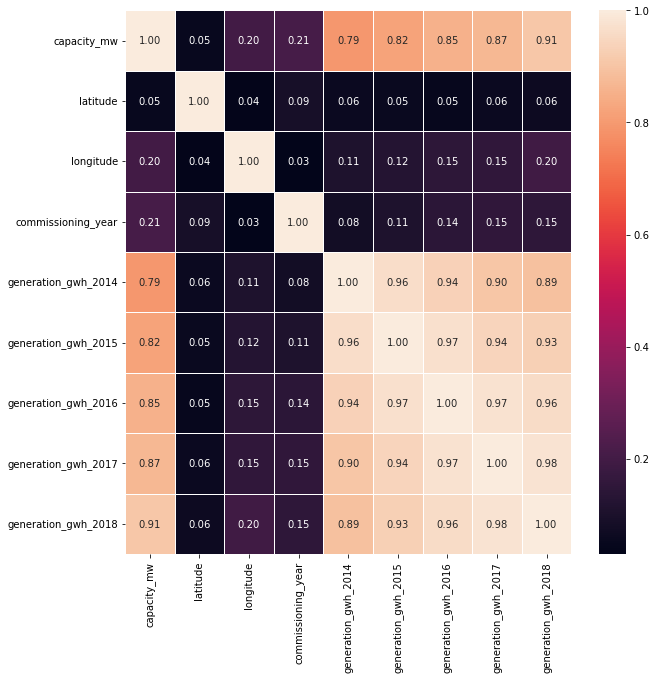

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor="white",fmt=".2f")

In [36]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [38]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


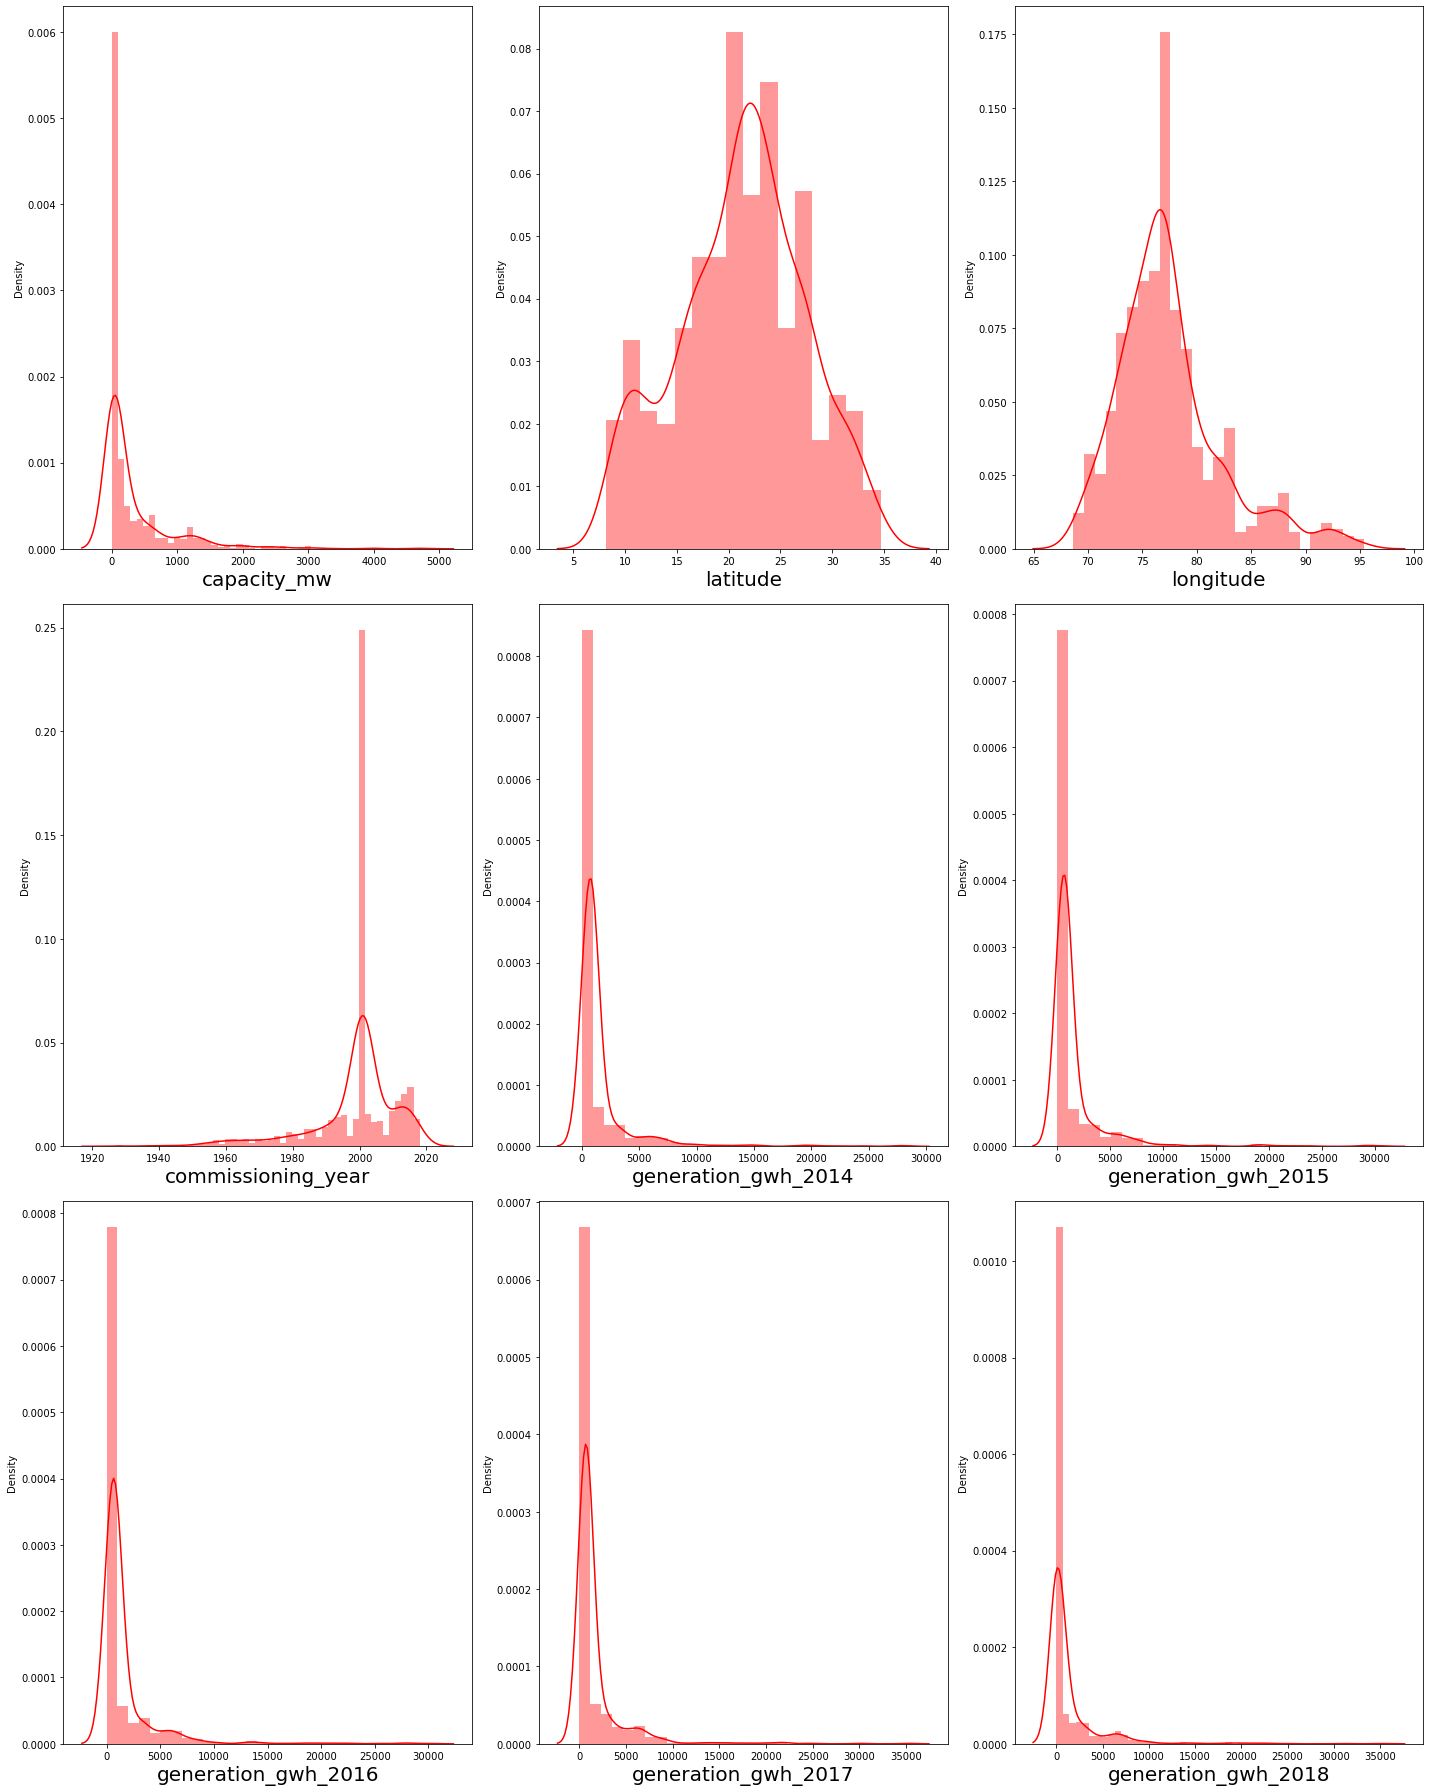

In [39]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above plot we can say that data is not normally distributed in numerical columns except latitude and longitude column.

# Comparing Target Variable capacity_mw with other:

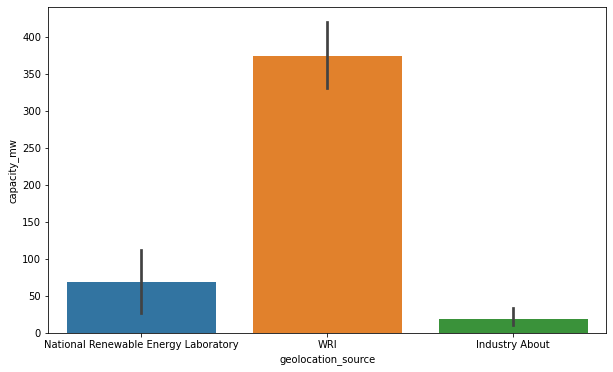

In [40]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

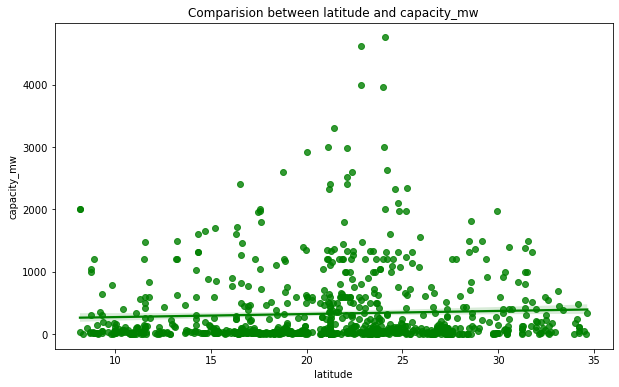

In [43]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and capacity_mw')
sns.regplot(df['latitude'],df['capacity_mw'],color = 'g');

#There is no relation between latitude and capacity_mw
#outliers are present

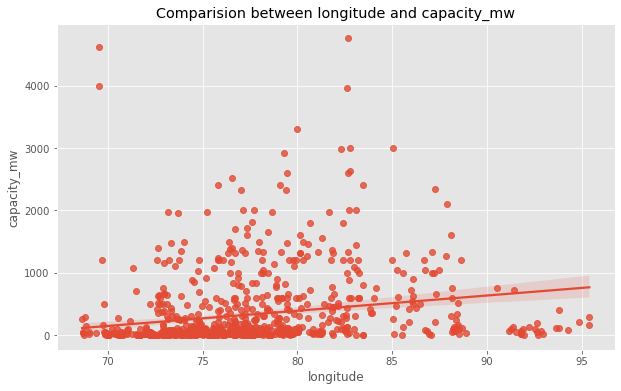

In [44]:
# let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw']);

In [45]:
# Outliers are present
# A very weak linear relation is observed in longitude and capacity_mw.

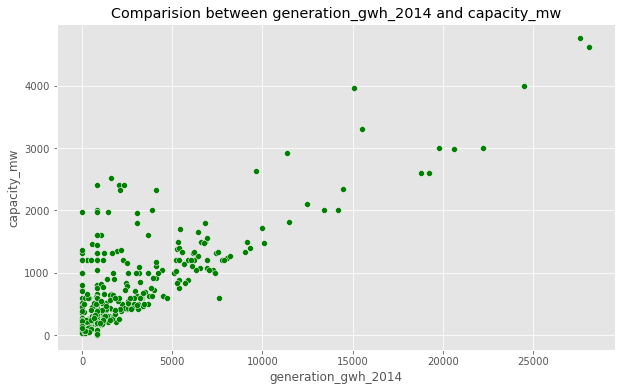

In [48]:
# let's check the capacity of the plant in generation_gwh_2014
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2014 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2014', y = 'capacity_mw', data = df,color='g')
plt.show()

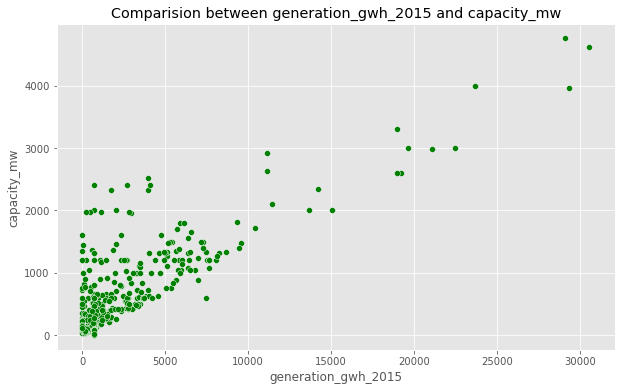

In [49]:
# let's check the capacity of the plant in generation_gwh_2015
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2015 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2015', y = 'capacity_mw', data = df,color='g')
plt.show()

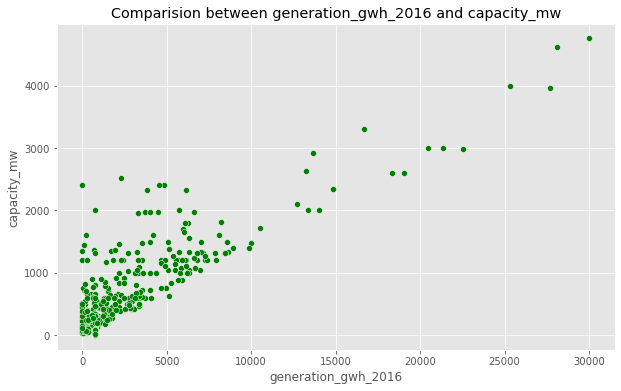

In [50]:
# let's check the capacity of the plant in generation_gwh_2016
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2016 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2016', y = 'capacity_mw', data = df,color='g')
plt.show()

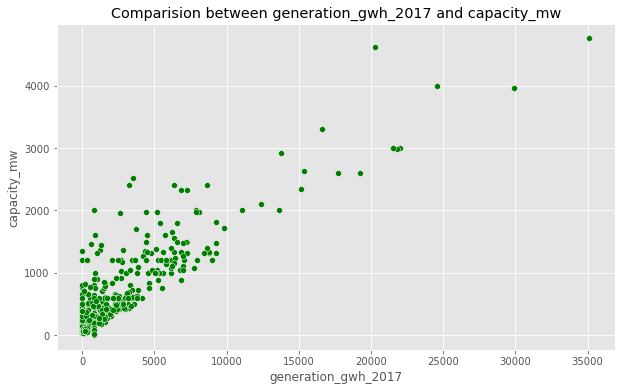

In [51]:
# let's check the capacity of the plant in generation_gwh_2017
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2017 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2017', y = 'capacity_mw', data = df,color='g')
plt.show()

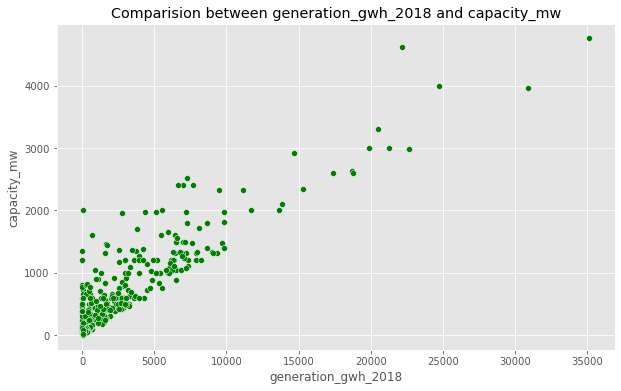

In [52]:
# let's check the capacity of the plant in generation_gwh_2018
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2018 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2018', y = 'capacity_mw', data = df,color='g')
plt.show()

There is a positive relation between the generation_gwh and capacity_mw.


# Comparing the target variable Fuel Types with other features


Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


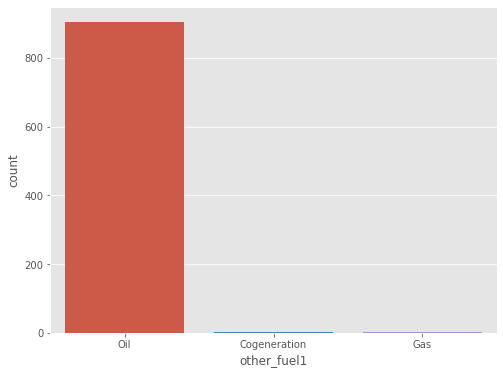

In [55]:
# visualizing the counts of other fuel
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
plt.show()

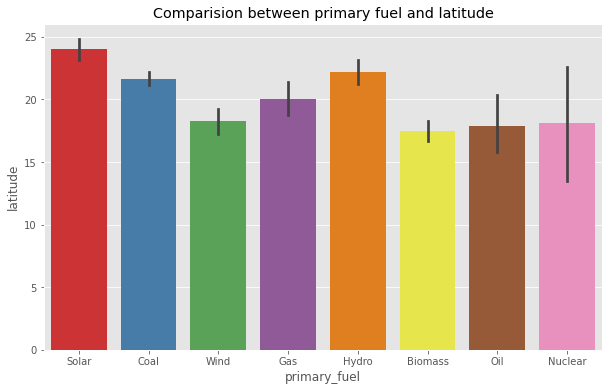

In [63]:
# Lets check how the latitude affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary fuel and latitude")
sns.barplot(x = 'primary_fuel', y = 'latitude', data = df,palette='Set1')
plt.show()


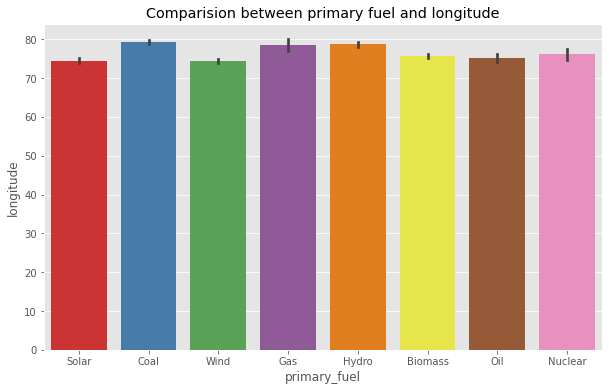

In [66]:
# Lets check how the longitude affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary fuel and longitude")
sns.barplot(x = 'primary_fuel', y = 'longitude', data = df,palette='Set1')
plt.show()

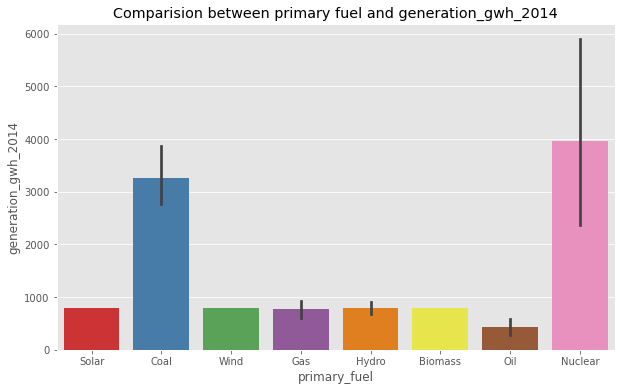

In [67]:
# Lets check how the generation_gwh_2014 affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary fuel and generation_gwh_2014")
sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2014', data = df,palette='Set1')
plt.show()

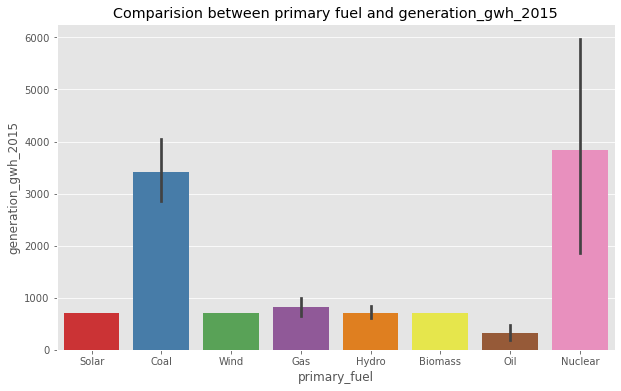

In [68]:
# Lets check how the generation_gwh_2015 affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary fuel and generation_gwh_2015")
sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2015', data = df,palette='Set1')
plt.show()

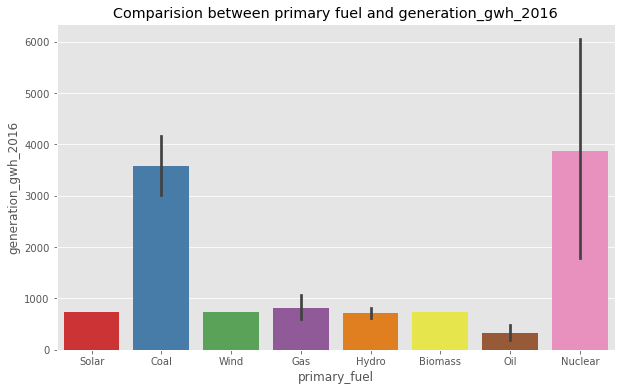

In [69]:
# Lets check how the generation_gwh_2016 affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary fuel and generation_gwh_2016")
sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2016', data = df,palette='Set1')
plt.show()

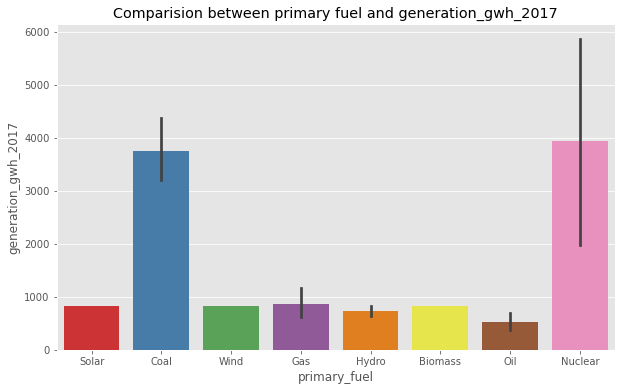

In [70]:
# Lets check how the generation_gwh_2017 affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary fuel and generation_gwh_2017")
sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2017', data = df,palette='Set1')
plt.show()

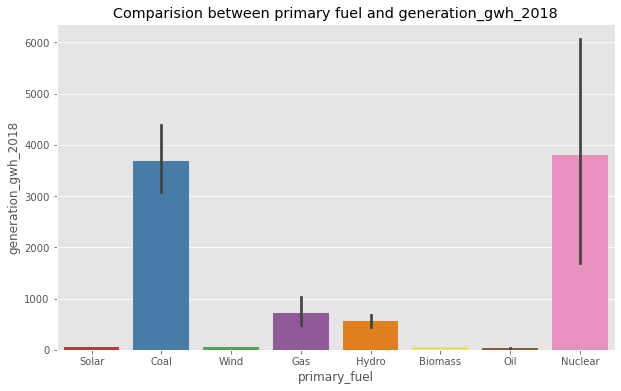

In [73]:
# Lets check how the generation_gwh_2018 affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary fuel and generation_gwh_2018")
sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2018', data = df,palette='Set1')
plt.show()

In [75]:
#Latitude and primary fuel comparision:
  #From the above graph, we can say that the most of the power plant uses the solar as a primary source to generate the electricity.
#Longitude and primary fuel comparision:
  #The longitude for all primary fuel is almost similar, there is no much difference in them.
#Generation_gwh and primary_fuel comparision:
  #From all years generation_gwh graph shows that the nuclear fuel has the high electricity generation report followe by the coal, but in the year 2018 the coal and nuclear fuel showed the almost same electricity generation.

# Checking the relation between targets


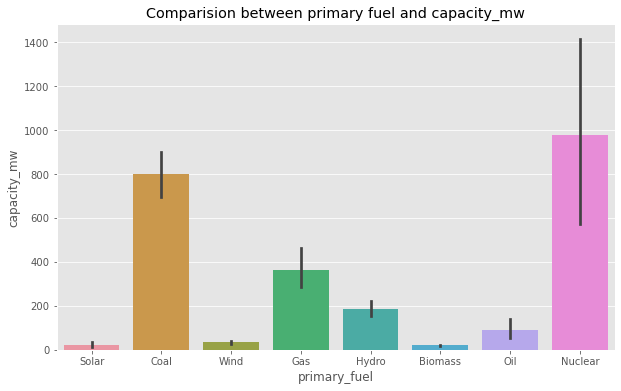

In [76]:
# let's check the relation between primary fuel and capacity_mw
plt.figure(figsize=(10,6))
plt.title("Comparision between primary fuel and capacity_mw")
sns.barplot(x= 'primary_fuel',y = 'capacity_mw',data = df)
plt.show()

# Multivariate Analysis


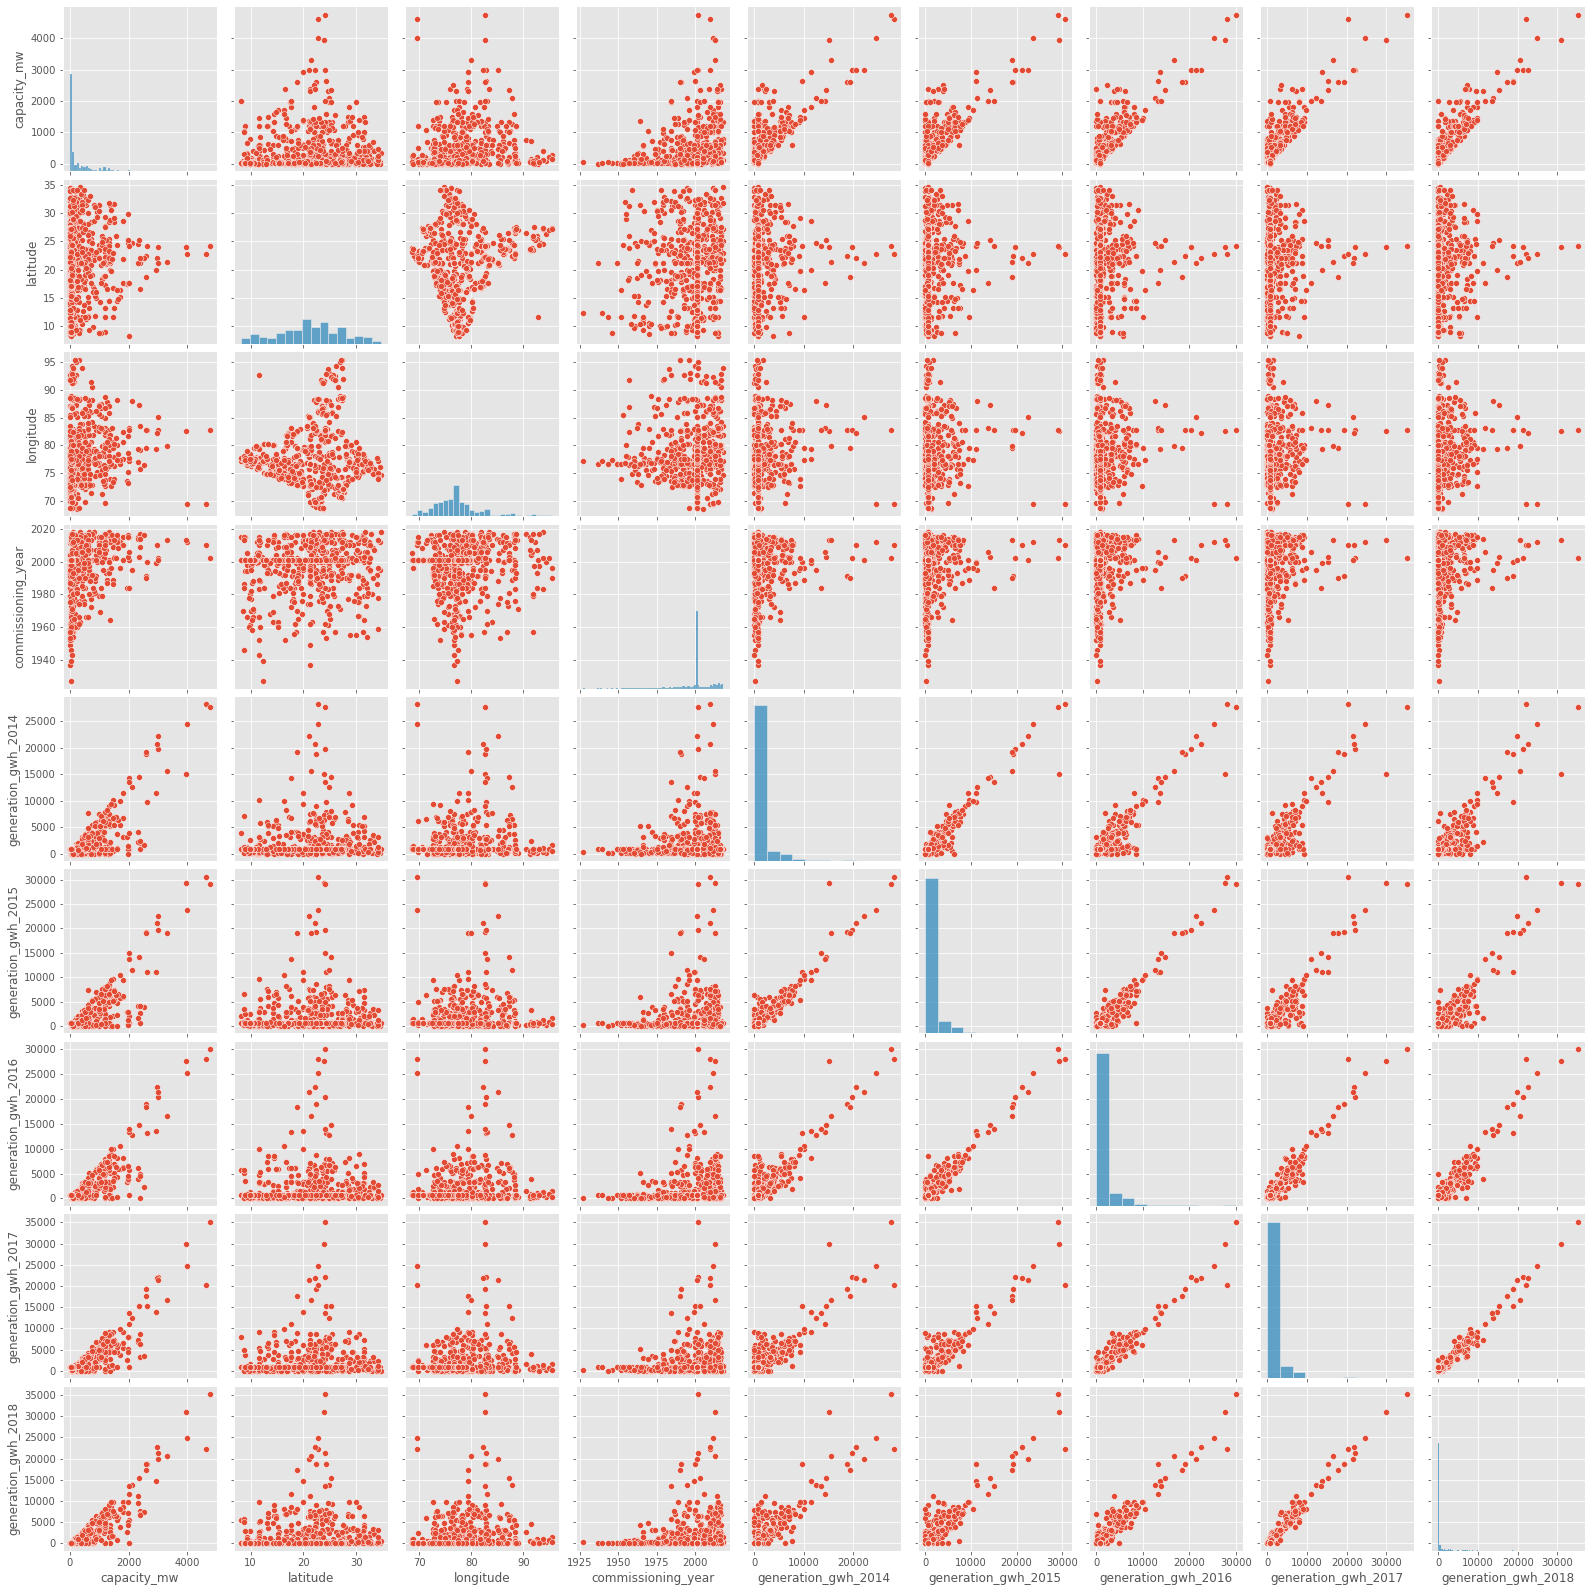

In [80]:
sns.pairplot(df, height = 2.5)
plt.show();


From above plot we can say that most of the columns have the strong linear relation.
Outliers are also so we will remove the outliers.

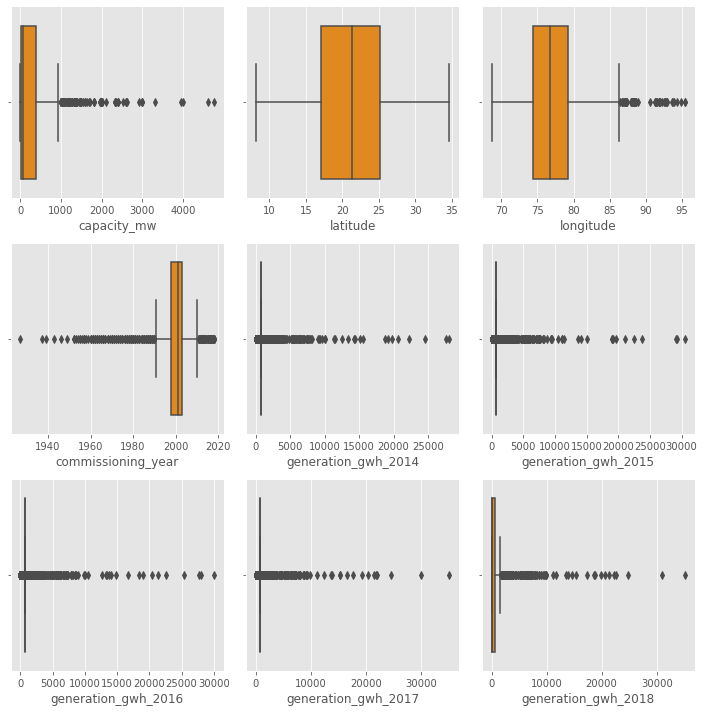

In [83]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# ZSCORE method


In [84]:
# Removing the outliers:

In [85]:
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','commissioning_year','capacity_mw']]


In [87]:
#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,commissioning_year,capacity_mw
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.382173,0.933076,0.548908
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.382173,0.172699,0.386977
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.382173,0.172699,0.486679
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.209552,0.400812,0.324240
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.815722,1.237227,2.498942
...,...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.191207,1.313265,2.159821
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.382173,0.172699,0.548060
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.382173,0.172699,0.509909
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.382173,0.172699,0.417498


In [88]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,59.200000
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,59.200000
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,59.200000
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,59.200000
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,59.200000
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,59.200000


In [89]:
df.shape


(907, 13)

In [90]:
new_df.shape


(846, 13)

In [91]:
# checking the data loss
data_loss = (908-852)/908*100
data_loss

6.167400881057269

# Encoding the categorical columns using Label Encoding


In [92]:
categorical_col = ['primary_fuel', 'other_fuel1','source','geolocation_source']

In [93]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

In [94]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# Correlation between the target variable and features using HEAT MAP


In [95]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.053430,0.267535,-0.399258,-0.003577,0.221471,-0.281067,0.239771,0.649177,0.698624,0.771628,0.788933,0.845435
latitude,0.053430,1.000000,-0.014702,-0.002374,0.037059,0.097493,0.069624,-0.203636,0.080164,0.069602,0.054649,0.070945,0.075706
longitude,0.267535,-0.014702,1.000000,-0.382790,0.029129,0.078514,-0.235295,0.263498,0.118292,0.151985,0.192754,0.194455,0.269886
primary_fuel,-0.399258,-0.002374,-0.382790,1.000000,0.006806,-0.067425,0.035757,-0.477833,-0.247812,-0.271721,-0.282330,-0.281962,-0.355393
other_fuel1,-0.003577,0.037059,0.029129,0.006806,1.000000,0.057973,0.028661,-0.022973,-0.000743,0.005719,0.015175,0.011257,0.009547
commissioning_year,0.221471,0.097493,0.078514,-0.067425,0.057973,1.000000,0.079711,-0.055035,0.055515,0.122384,0.192343,0.209235,0.180637
source,-0.281067,0.069624,-0.235295,0.035757,0.028661,0.079711,1.000000,-0.497294,-0.140080,-0.153732,-0.156141,-0.152218,-0.238245
geolocation_source,0.239771,-0.203636,0.263498,-0.477833,-0.022973,-0.055035,-0.497294,1.000000,0.112280,0.123223,0.125154,0.122010,0.190964
generation_gwh_2014,0.649177,0.080164,0.118292,-0.247812,-0.000743,0.055515,-0.140080,0.112280,1.000000,0.913705,0.802119,0.754073,0.749739
generation_gwh_2015,0.698624,0.069602,0.151985,-0.271721,0.005719,0.122384,-0.153732,0.123223,0.913705,1.000000,0.909054,0.835419,0.827429


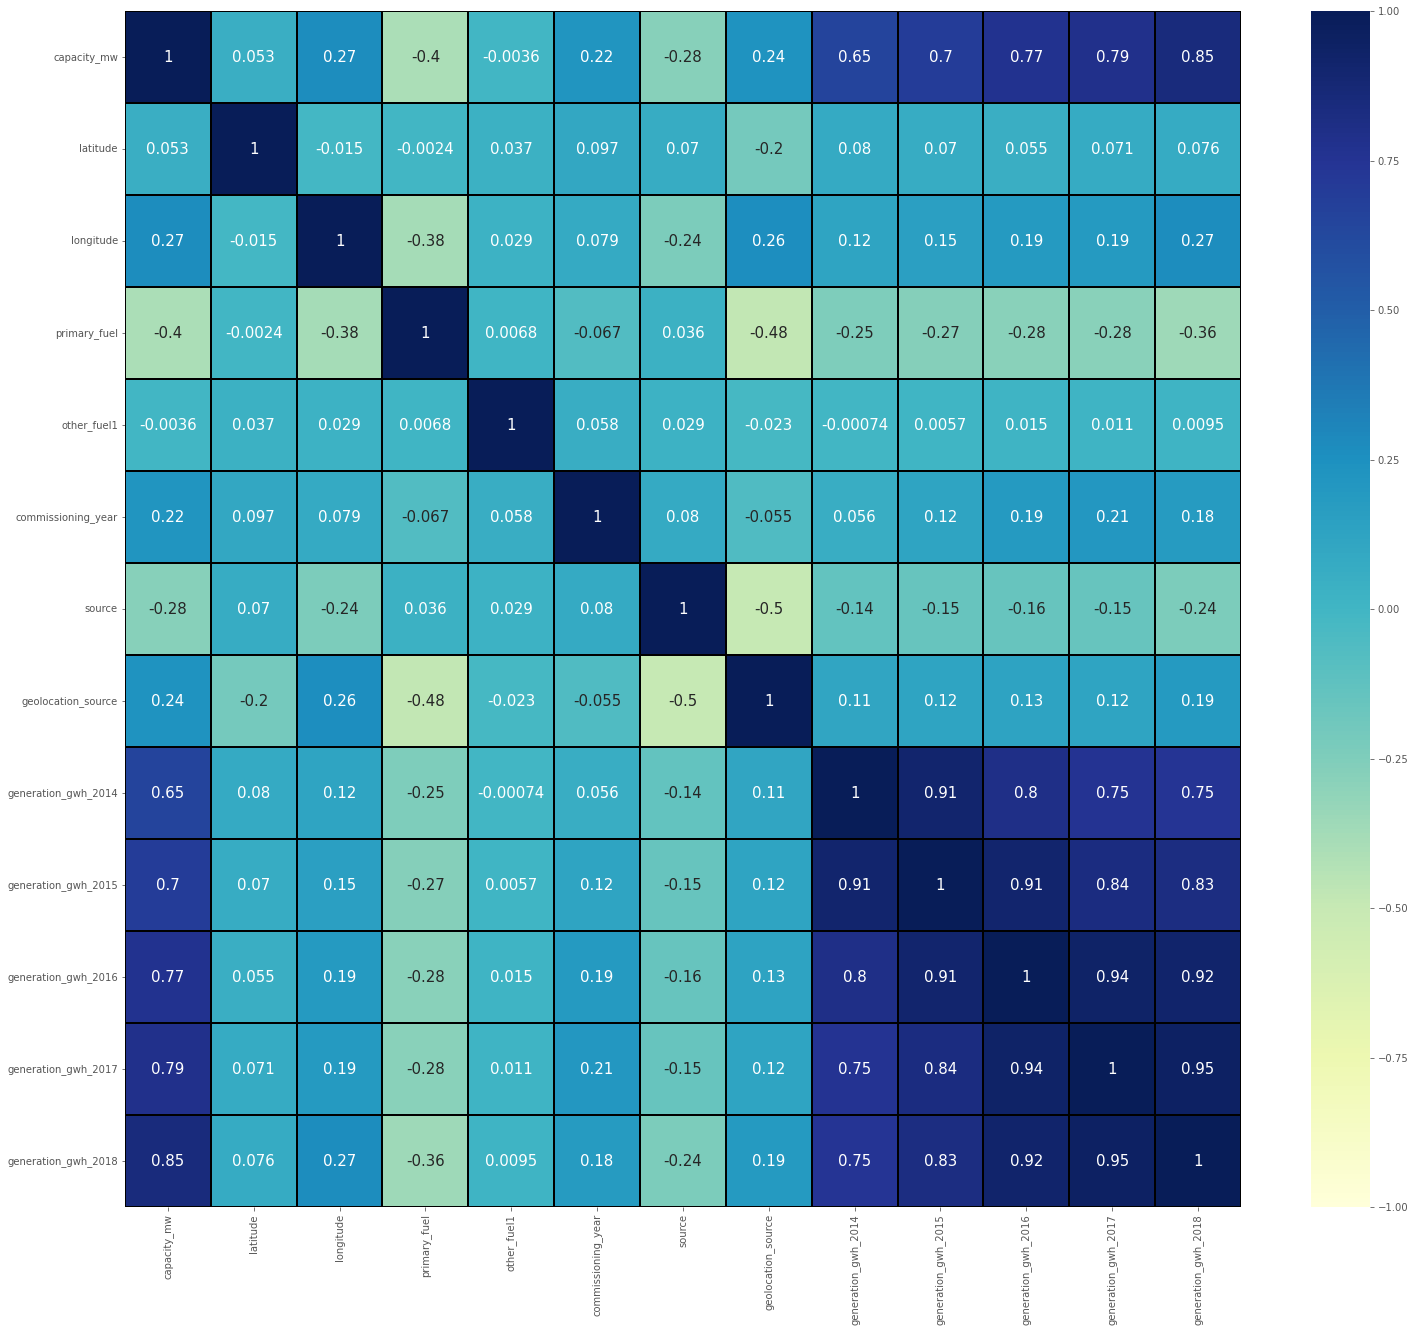

In [96]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);


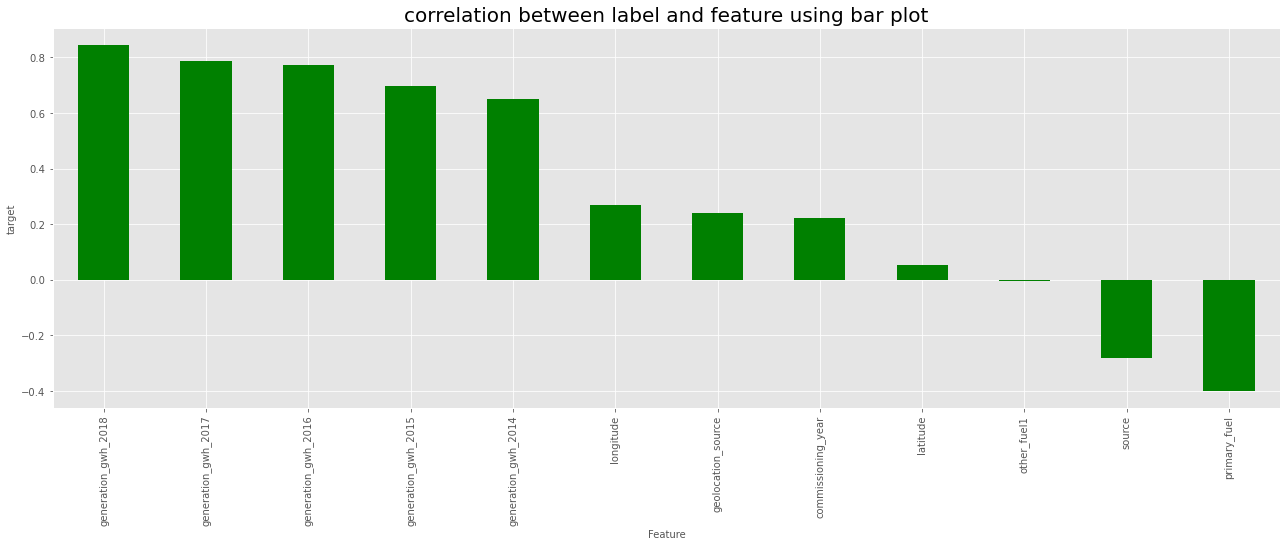

In [97]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [98]:
# dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

# 1. Prediction for capacity_mw


# Separating the features and label variables into x and y


In [99]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [100]:
x.shape

(846, 10)

In [101]:
x.skew()

longitude              0.948983
primary_fuel           0.404222
commissioning_year    -1.288240
source                 1.724898
geolocation_source    -2.056692
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.546681
dtype: float64

In [102]:
skew = ['longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [103]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.918187,1.522671,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
1,-0.496301,1.976432,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
2,-2.373965,-0.489921,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
3,2.426620,-0.423626,-0.263441,0.101715,0.111906,-0.191976,0.705024
4,1.262372,-0.423626,1.432304,2.302682,2.301691,2.020971,1.919226


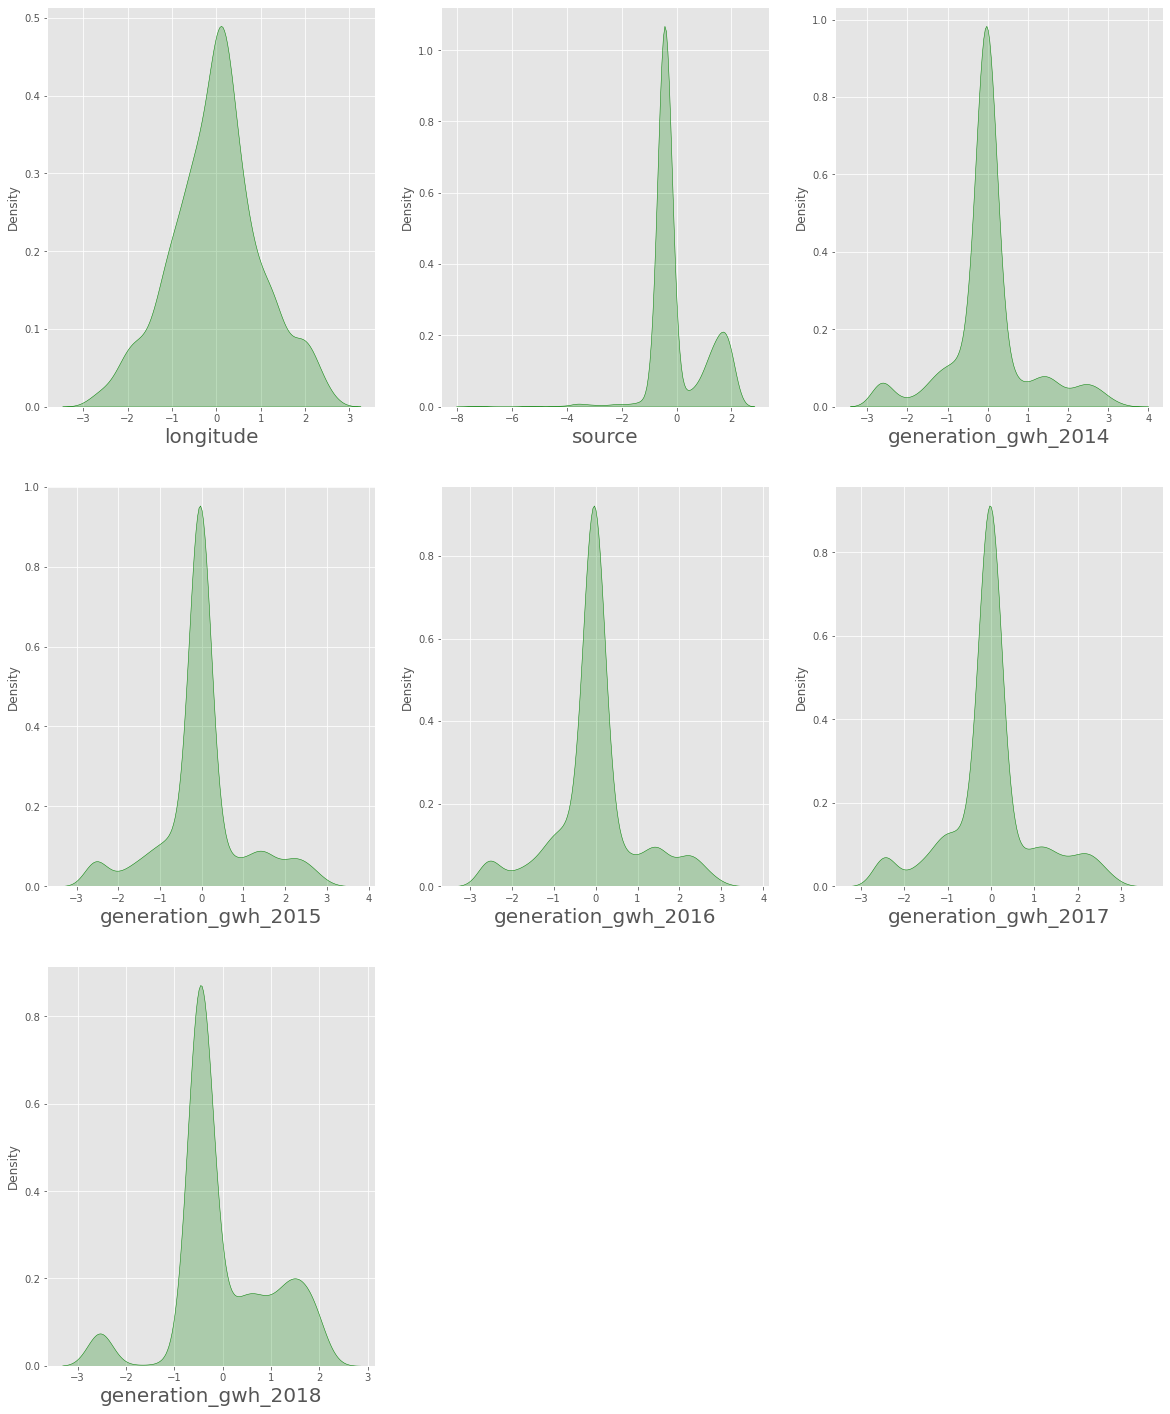

In [104]:
# checking how the data has been distributed in each columns.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.918187,1.169593,1.017502,1.522671,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
1,-0.496301,-0.981441,0.117077,1.976432,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
2,-2.373965,1.599800,0.117077,-0.489921,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
3,2.426620,-0.551234,0.387204,-0.423626,0.408546,-0.263441,0.101715,0.111906,-0.191976,0.705024
4,1.262373,-0.981441,1.377672,-0.423626,0.408546,1.432304,2.302682,2.301691,2.020971,1.919226
...,...,...,...,...,...,...,...,...,...,...
841,0.234562,-0.981441,1.467715,-0.423626,0.408546,-0.038481,-2.461769,-0.842413,0.020775,0.750665
842,0.423902,1.169593,0.117077,1.153685,-2.471705,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
843,-0.221150,1.599800,0.117077,-0.489921,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
844,-0.756895,-0.981441,0.117077,0.851543,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.326189,longitude
1,1.695284,primary_fuel
2,1.110162,commissioning_year
3,1.364345,source
4,1.635860,geolocation_source
5,3.561557,generation_gwh_2014
6,6.259208,generation_gwh_2015
7,10.556442,generation_gwh_2016
8,5.948256,generation_gwh_2017
9,2.905882,generation_gwh_2018


In [107]:
# DataFrame after preprocessing and data cleaning
x.head()


,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.918187,1.169593,1.017502,1.522671,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
1,-0.496301,-0.981441,0.117077,1.976432,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
2,-2.373965,1.599800,0.117077,-0.489921,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
3,2.426620,-0.551234,0.387204,-0.423626,0.408546,-0.263441,0.101715,0.111906,-0.191976,0.705024
4,1.262373,-0.981441,1.377672,-0.423626,0.408546,1.432304,2.302682,2.301691,2.020971,1.919226


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [109]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.863147165553614  on Random_state  130


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Regression Algorithms


In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest Regressor


In [112]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 0.8614636592808822
MAE: 86.1024560611829
MSE: 21101.471464774306
RNSE: 145.26345536567106


# Decision Tree Regressor


In [113]:
# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.7183931667242658
MAE: 112.26370078740158
MSE: 42893.5723710315
RNSE: 207.10763474829096


# KNeighbors Regressor


# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

# Gradient Boosting Regressor


In [115]:
# checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.8420786972209565
MAE: 90.63890580845649
MSE: 24054.13516030676
RNSE: 155.09395591159173


# Bagging Regressor


In [116]:
# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8569567446933085
MAE: 87.32845085500676
MSE: 21787.952203836707
RNSE: 147.60742597795243


# Checking the cross validation score


In [117]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7779704191194856


In [118]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.6227446648729255


In [119]:
# checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7353947007844678


In [120]:
# checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7558613708386858


In [121]:
# checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7540590511358478


from the above cross validation score we can say that Random forest regressor model is the best fit model.

# Hyper Parameter Tuning


In [122]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [123]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [124]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [125]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [126]:
capacity = RandomForestRegressor(criterion='mse',max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 145.26345536567106
R2_Score: 87.5541047072091


# Saving the Model


In [127]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# 2. Prediction for Fuel_Type

In [128]:
x_df = new_df.drop("primary_fuel", axis=1)
y_df = new_df["primary_fuel"]

In [129]:
x_df.shape

(846, 10)

In [130]:
y_df.shape


(846,)

# Checking for Skewness


In [131]:
x_df.skew()


capacity_mw            1.992633
longitude              0.948983
commissioning_year    -1.288240
source                 1.724898
geolocation_source    -2.056692
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.546681
dtype: float64

In [132]:
skew = ['capacity_mw','longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [133]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676116,-0.918187,1.522671,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
1,0.231634,-0.496301,1.976432,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
2,-0.266730,-2.373965,-0.489921,-0.038481,-0.041708,-0.041000,-0.025789,-0.466531
3,0.404484,2.426620,-0.423626,-0.263441,0.101715,0.111906,-0.191976,0.705024
4,1.759489,1.262372,-0.423626,1.432304,2.302682,2.301691,2.020971,1.919226


In [135]:
# checking skewness after using yeo-johnson method
x_df.skew()

capacity_mw           -0.026240
longitude              0.000881
commissioning_year    -1.288240
source                -0.764670
geolocation_source    -2.056692
generation_gwh_2014   -0.100599
generation_gwh_2015   -0.087819
generation_gwh_2016   -0.085834
generation_gwh_2017   -0.060939
generation_gwh_2018   -0.215141
dtype: float64

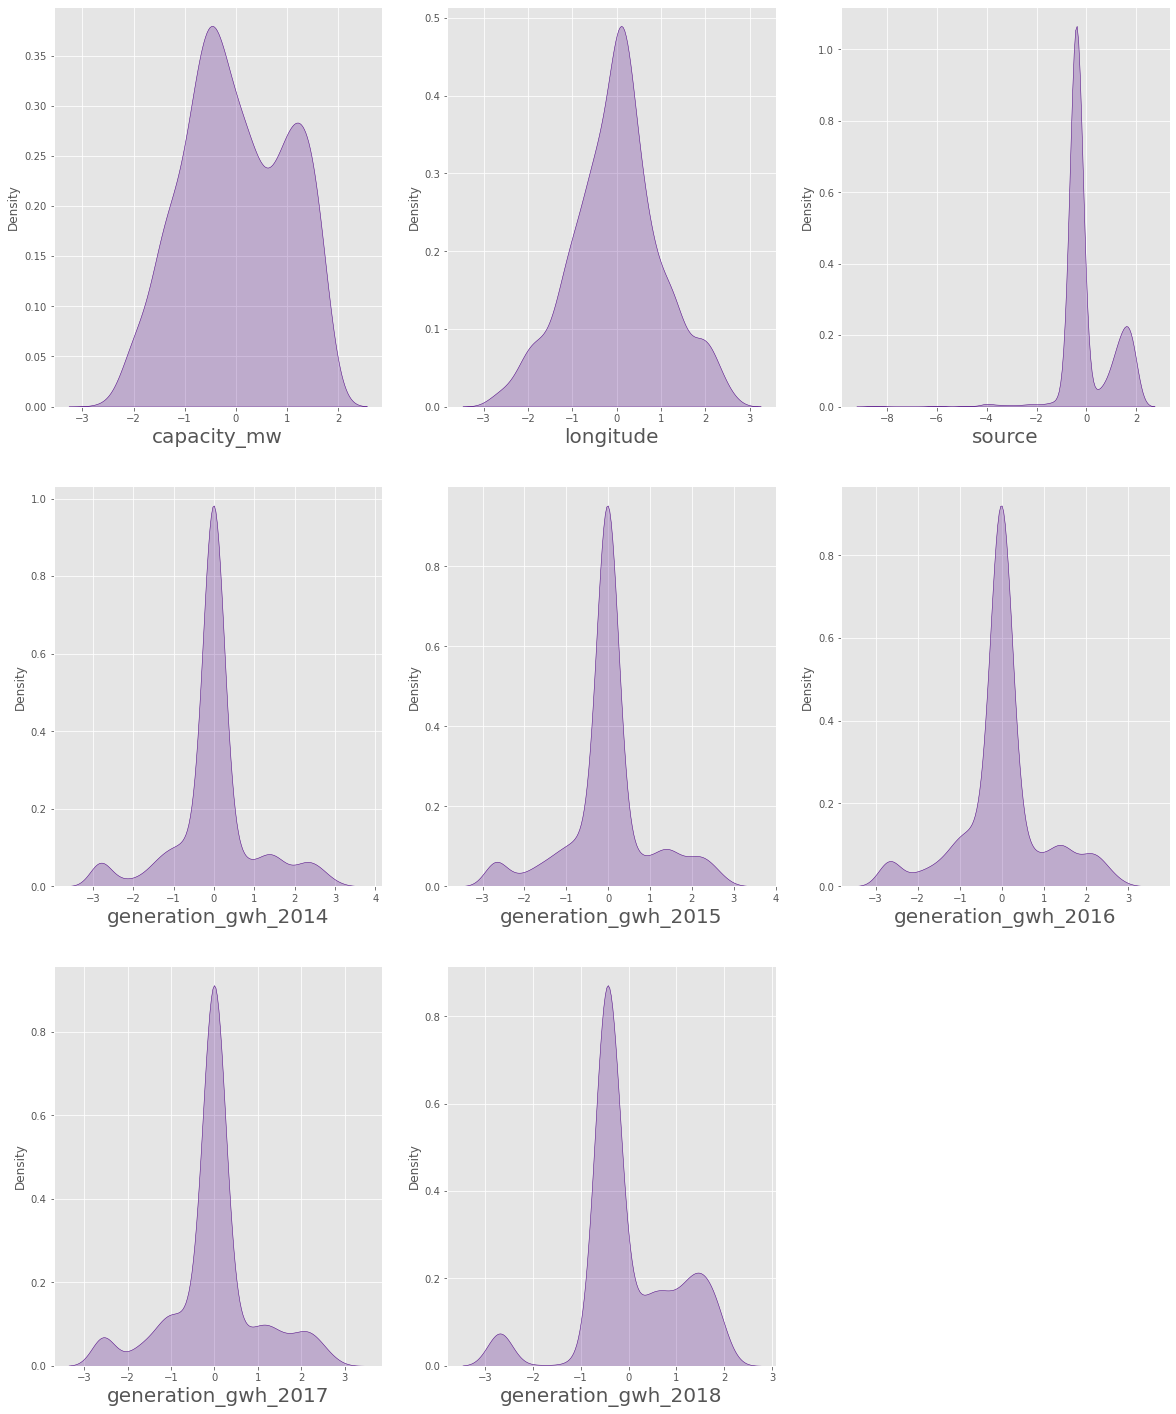

In [136]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

skewness has been removed.

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.700327,-0.918192,1.017502,1.473531,-1.031579,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
1,0.245033,-0.496370,0.117077,1.880212,0.408546,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
2,-0.253674,-2.373567,0.117077,-0.465555,0.408546,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
3,0.416017,2.427036,0.387204,-0.396503,0.408546,-0.238800,0.126395,0.135970,-0.172858,0.717752
4,1.733287,1.262440,1.377672,-0.396503,0.408546,1.401202,2.208823,2.210327,1.963229,1.845358
...,...,...,...,...,...,...,...,...,...,...
841,1.675815,0.234469,1.467715,-0.396503,0.408546,-0.010521,-2.586744,-0.840688,0.041167,0.761208
842,-1.617808,0.423825,0.117077,1.136971,-2.471705,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
843,-0.491083,-0.221244,0.117077,-0.465555,0.408546,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
844,0.135766,-0.756927,0.117077,0.856717,0.408546,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257


In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.999026,capacity_mw
1,1.225661,longitude
2,1.149919,commissioning_year
3,1.209209,source
4,1.479665,geolocation_source
5,3.389232,generation_gwh_2014
6,5.891913,generation_gwh_2015
7,10.075819,generation_gwh_2016
8,5.567700,generation_gwh_2017
9,3.172921,generation_gwh_2018


In [139]:
y_df.value_counts()

1    233
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [140]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [141]:
y_df.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64

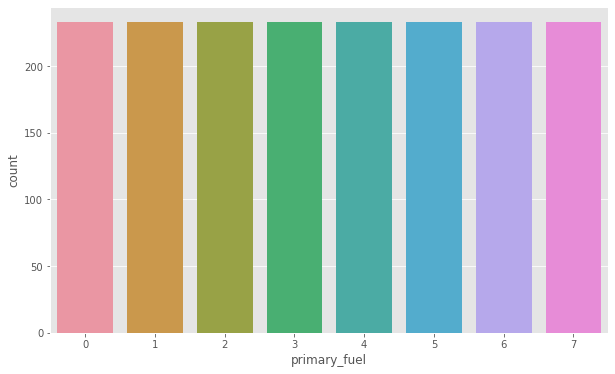

In [142]:
# visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

In [143]:
x_df.head()

,capacity_mw,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.700327,-0.918192,1.017502,1.473531,-1.031579,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
1,0.245033,-0.496370,0.117077,1.880212,0.408546,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
2,-0.253674,-2.373567,0.117077,-0.465555,0.408546,-0.010521,-0.016923,-0.016752,-0.005449,-0.444257
3,0.416017,2.427036,0.387204,-0.396503,0.408546,-0.238800,0.126395,0.135970,-0.172858,0.717752
4,1.733287,1.262440,1.377672,-0.396503,0.408546,1.401202,2.208823,2.210327,1.963229,1.845358


# Finding the best random state


In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9125  on Random_state  37


In [145]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)


In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier


In [147]:
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.9035714285714286
[[65  2  0  0  0  0  0  0]
 [ 1 45  7  5  5  3  0  0]
 [ 0  2 57  4  0  2  0  0]
 [ 0  9  2 55  1  0  0  0]
 [ 0  3  0  1 57  1  0  0]
 [ 2  1  1  0  0 76  0  0]
 [ 1  1  0  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.71      0.68      0.70        66
           2       0.85      0.88      0.86        65
           3       0.85      0.82      0.83        67
           4       0.90      0.92      0.91        62
           5       0.93      0.95      0.94        80
           6       1.00      0.97      0.99        78
           7       1.00      1.00      1.00        75

    accuracy                           0.90       560
   macro avg       0.90      0.90      0.90       560
weighted avg       0.90      0.90      0.90       560



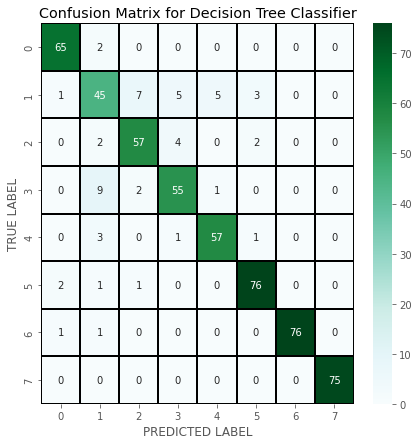

In [150]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Random Forest Classifier


In [151]:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test, predRFC))

0.9267857142857143
[[65  1  0  0  0  1  0  0]
 [ 4 50  4  6  1  1  0  0]
 [ 0  2 57  4  0  2  0  0]
 [ 0  6  5 56  0  0  0  0]
 [ 0  2  0  0 60  0  0  0]
 [ 0  1  0  0  0 79  0  0]
 [ 1  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.81      0.76      0.78        66
           2       0.86      0.88      0.87        65
           3       0.85      0.84      0.84        67
           4       0.98      0.97      0.98        62
           5       0.95      0.99      0.97        80
           6       1.00      0.99      0.99        78
           7       1.00      1.00      1.00        75

    accuracy                           0.93       560
   macro avg       0.92      0.92      0.92       560
weighted avg       0.93      0.93      0.93       560



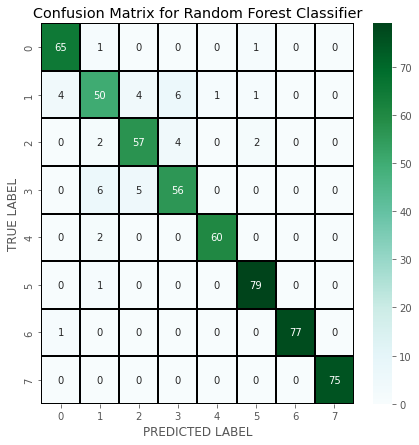

In [152]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Support Vector Classifier


In [153]:
svc = SVC()
svc.fit(x_df_train,y_df_train)

# prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.8321428571428572
[[64  0  0  0  0  1  0  2]
 [ 7 31  8  4  9  3  0  4]
 [ 1  2 43  8  2  8  0  1]
 [ 0 10  9 40  0  0  0  8]
 [ 0  0  0  0 62  0  0  0]
 [ 2  1  0  0  0 74  0  3]
 [ 0  1  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        67
           1       0.69      0.47      0.56        66
           2       0.72      0.66      0.69        65
           3       0.77      0.60      0.67        67
           4       0.85      1.00      0.92        62
           5       0.86      0.93      0.89        80
           6       1.00      0.99      0.99        78
           7       0.81      1.00      0.89        75

    accuracy                           0.83       560
   macro avg       0.82      0.82      0.82       560
weighted avg       0.82      0.83      0.82       560



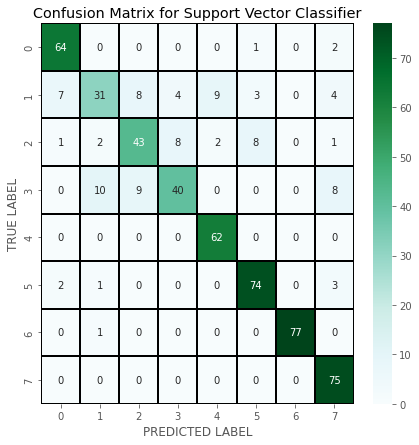

In [154]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Support Vector Classifier")
plt.show()

# KNeighbors Classifier


In [155]:
knn = KNN()
knn.fit(x_df_train,y_df_train)

# prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test, predknn))

0.8696428571428572
[[67  0  0  0  0  0  0  0]
 [ 5 38  5  7  8  1  0  2]
 [ 1  1 51  4  0  8  0  0]
 [ 0  9  6 46  0  0  0  6]
 [ 0  1  0  0 61  0  0  0]
 [ 2  2  5  0  0 71  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        67
           1       0.75      0.58      0.65        66
           2       0.76      0.78      0.77        65
           3       0.81      0.69      0.74        67
           4       0.88      0.98      0.93        62
           5       0.89      0.89      0.89        80
           6       1.00      1.00      1.00        78
           7       0.90      1.00      0.95        75

    accuracy                           0.87       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.87      0.86       560



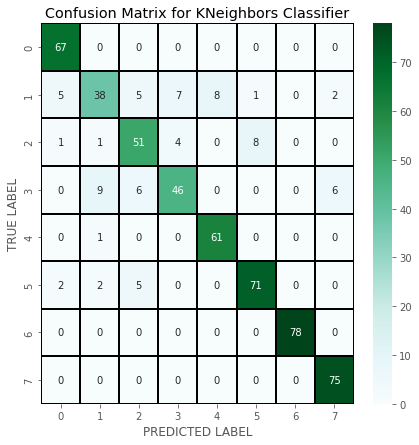

In [156]:
# let's plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNeighbors Classifier")
plt.show()


# Gradient Boosting Classifier


In [157]:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test, predGB))

0.9232142857142858
[[65  1  0  0  0  1  0  0]
 [ 3 51  3  5  3  1  0  0]
 [ 1  1 55  5  0  3  0  0]
 [ 0  6  4 57  0  0  0  0]
 [ 0  2  0  0 60  0  0  0]
 [ 0  1  2  0  0 77  0  0]
 [ 0  1  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.81      0.77      0.79        66
           2       0.86      0.85      0.85        65
           3       0.85      0.85      0.85        67
           4       0.95      0.97      0.96        62
           5       0.94      0.96      0.95        80
           6       1.00      0.99      0.99        78
           7       1.00      1.00      1.00        75

    accuracy                           0.92       560
   macro avg       0.92      0.92      0.92       560
weighted avg       0.92      0.92      0.92       560



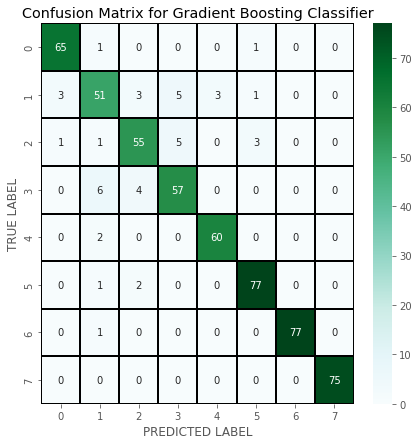

In [158]:
# let's plot confusion matrix for GB
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Bagging Classifier


In [159]:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test, predBC))

0.9196428571428571
[[65  1  0  0  0  1  0  0]
 [ 3 48  3  7  3  2  0  0]
 [ 0  1 57  5  0  2  0  0]
 [ 0  7  4 56  0  0  0  0]
 [ 0  1  0  0 61  0  0  0]
 [ 1  1  2  0  0 76  0  0]
 [ 1  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.81      0.73      0.77        66
           2       0.86      0.88      0.87        65
           3       0.82      0.84      0.83        67
           4       0.95      0.98      0.97        62
           5       0.94      0.95      0.94        80
           6       1.00      0.99      0.99        78
           7       1.00      1.00      1.00        75

    accuracy                           0.92       560
   macro avg       0.92      0.92      0.92       560
weighted avg       0.92      0.92      0.92       560



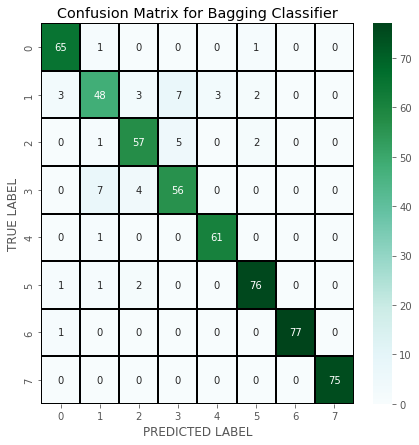

In [160]:
# let's plot confusion matrix for BC
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Bagging Classifier")
plt.show()

# Checking the Cross Validation Score


In [162]:
from sklearn.model_selection import cross_val_score


In [163]:
# cv scor for Decision Tree Classifier
print(cross_val_score(DTC ,x_df,y_df,cv=5).mean())

0.8664259563550406


In [164]:
# cv scor for Random Forest Classifier
print(cross_val_score(RFC ,x_df,y_df,cv=5).mean())

0.9077171437631526


In [165]:
# cv scor for Support Vector Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.8208120729914382


In [166]:
# cv scor for KNeighbors Classifier
print(cross_val_score(knn ,x_df,y_df,cv=5).mean())

0.8583628816051198


In [167]:
# cv scor for Gradient Boosting Classifier
print(cross_val_score(GB ,x_df,y_df,cv=5).mean())

0.8943166421632217


In [168]:
# cv scor for Bagging Classifier
print(cross_val_score(BC ,x_df,y_df,cv=5).mean())

0.8959237798725821


so from the above cross validation we can say that gradient boosting classifier is best fit model.

# Hyper Parameter Tuning


In [169]:
from sklearn.model_selection import GridSearchCV


In [170]:
# Gradient Boosting Classifier
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [171]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [172]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [174]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [176]:
primary_fuel =GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='log2', n_estimators=200)
primary_fuel.fit(x_df_train,y_df_train)
pred = primary_fuel.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

92.85714285714286


# saving the model:

In [180]:
import joblib
joblib.dump(primary_fuel,"Global_Power_Plant_Primary_Fuel.pkl")

['Global_Power_Plant_Primary_Fuel.pkl']

# Conclusion:

- The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithm is = 87%
- The final Accuracy  for the prediction of Fuel_Type of the power plant using Classification algorithm is = 92.8%

# The End